In [317]:
from HeaderP import *

In [690]:
df=pd.read_pickle('../SecondYear_2/Data/CannonDR16_cut.pkl')

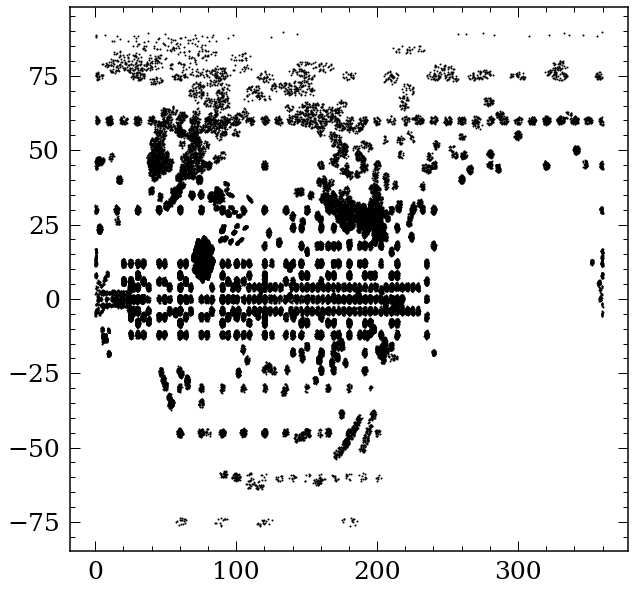

In [564]:
plt.scatter(df['GLON'],df['GLAT'],s=1,c='k')

In [674]:
from astropy.coordinates import Angle, Latitude, Longitude
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5

In [691]:
df['dist']=np.sqrt(df['X']**2+df['Y']**2)
df=df.dropna(subset=['dist'])
c = SkyCoord(df['RA'].values*u.deg, df['DEC'].values*u.deg, distance=df['dist'].values*u.kpc,frame='icrs')
c.cartesian

<CartesianRepresentation (x, y, z) in kpc
    [( 0.93197003,  4.71089455, 2.16757223),
     ( 0.56384743,  3.1907137 , 1.43211326),
     ( 0.63861564,  3.91647911, 1.74544778), ...,
     (-0.20264985, -0.27534216, 0.32470869),
     (-0.64034841, -0.87246907, 1.06044625),
     (-0.20816809, -0.28708985, 0.33267669)]>

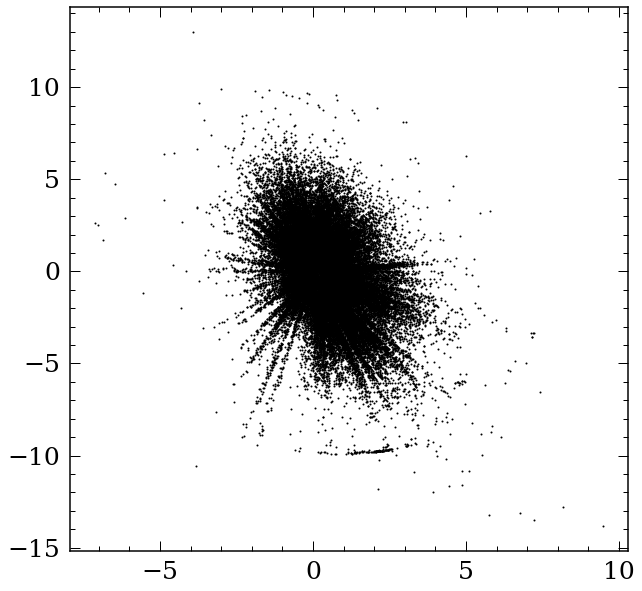

In [676]:
plt.scatter(c.cartesian.x,c.cartesian.y,s=1,c='k')

In [573]:
d=SkyCoord(c.cartesian.x, c.cartesian.y, c.cartesian.z, representation='cartesian')

In [574]:
d.representation = 'spherical'
d

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [( 78.809506, 24.293034, 5.26872518),
     ( 79.978432, 23.844934, 3.54253104),
     ( 80.738934, 23.742699, 4.33511551), ...,
     (233.647199, 43.524593, 0.47150398),
     (233.723204, 44.417191, 1.51518798),
     (234.054233, 43.171432, 0.48623895)]>

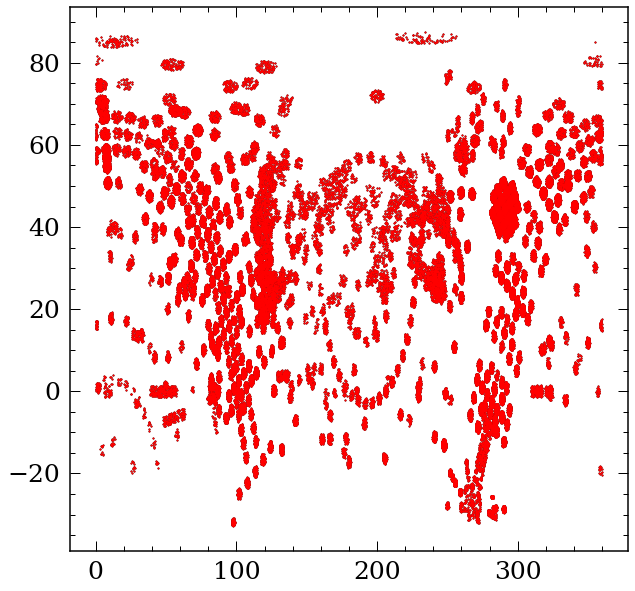

In [575]:
plt.scatter(d.ra,d.dec,s=1,c='k')
plt.scatter(df['RA'],df['DEC'],s=1,c='r')

create mask for simulation

In [692]:
#sim=pd.read_pickle('Data/Buck_g2_79e12.pkl')
sim=pd.read_pickle('Data/Buck_g7_08e11.pkl')
sim['x']=sim['x_today']+8.2
sim['y']=sim['y_today']
sim['z']=sim['z_today']

In [693]:
sim=sim.dropna(subset=['x','y','z']).reset_index(drop=True)

In [694]:
d=SkyCoord(sim.x.values*u.kpc, sim.y.values*u.kpc, sim.z.values*u.kpc, representation='cartesian')

In [695]:
d.representation = 'spherical'
d

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(3.59571447e+02,  3.01661209, 8.07887004),
     (3.87324725e-01, -1.97963207, 8.03354904),
     (8.24670558e-02,  3.09581173, 8.18602662), ...,
     (3.40809787e+02,  0.34735831, 7.42265457),
     (8.54915748e+00,  0.33007693, 5.86889461),
     (7.62203725e+00, -1.0911364 , 9.53529133)]>

In [696]:
sim['ra']=d.ra
sim['dec']=d.dec
sim['dist']=d.distance

In [697]:
sim=sim.loc[sim['dec']>-50].reset_index(drop=True)

In [698]:
#sim=sim.loc[sim['R']<20].reset_index(drop=True)

In [699]:
sim=sim.loc[abs(sim['z'])<5].reset_index(drop=True)

(4629568, 31)


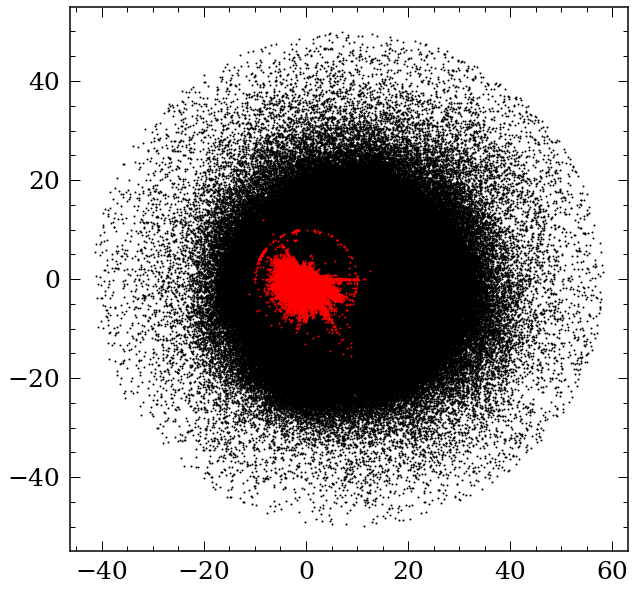

In [584]:
plt.scatter(sim['x'],sim['y'],c='k',s=1)
plt.scatter(df['X'],df['Y'],c='r',s=1)
print(np.shape(sim))

(4628767, 32)


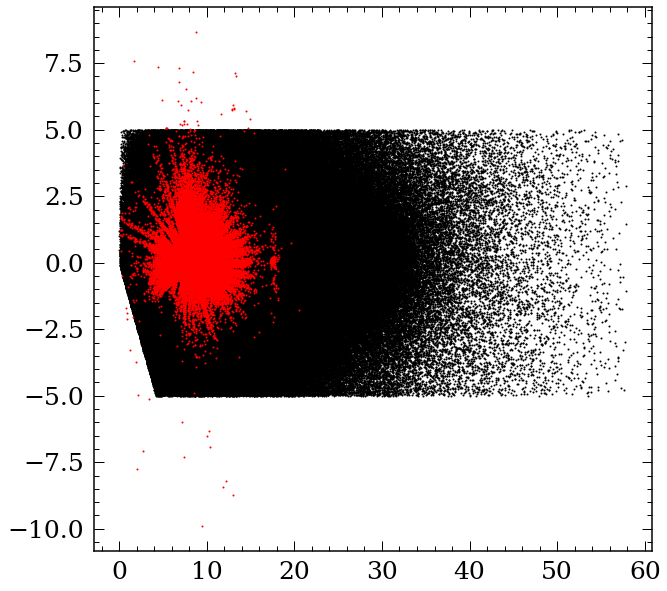

In [511]:
sim['R']=np.sqrt(sim['x']**2+sim['y']**2)
plt.scatter(sim['R'],sim['z'],c='k',s=1)
plt.scatter(df['R'],df['z'],c='r',s=1)
print(np.shape(sim))

In [653]:
np.shape(sim),np.shape(df)

((2521599, 31), (64399, 230))

In [700]:
sim=sim[['iords','ra','dec','dist']]

Get stars closest to location of the APOGEE star

In [701]:
def findstars(f1,f2,f3,ids,f1_star,f2_star,f3_star,cutnumb=20):
    # f1,f2,f3,ids are data you try to match to and the ids
    # f1_star, f2_star, f3_star is the selection you want to match to (nomrall smaller number)
    KIDs=np.array([])
    count=0
    
    xes=np.linspace(min(f1),max(f1),cutnumb+1)
    yes=np.linspace(min(f2),max(f2),cutnumb+1)
    zes=np.linspace(min(f3),max(f3),cutnumb+1)

    for i in trange(cutnumb):
        m1=f1_star>xes[i]
        m2=f1_star<xes[i+1]
        m=m1&m2
        if sum(m)==0:
            continue
        f1_star_x,f2_star_x,f3_star_x=f1_star[m],f2_star[m],f3_star[m]
        
            
        m1_sim=f1>xes[i]
        m2_sim=f1<xes[i+1]
        m=m1_sim&m2_sim
        f1_x,f2_x,f3_x,ids_x=f1[m],f2[m],f3[m],ids[m]
                    
        for j in range(cutnumb):
            
            m1=f2_star_x>yes[j]
            m2=f2_star_x<yes[j+1]
            m=m1&m2
            if sum(m)==0:
                continue

            f1_star_y,f2_star_y,f3_star_y=f1_star_x[m],f2_star_x[m],f3_star_x[m]
            
            
            m1_sim=f2_x>yes[j]
            m2_sim=f2_x<yes[j+1]
            m=m1_sim&m2_sim
            f1_y,f2_y,f3_y,ids_y=f1_x[m],f2_x[m],f3_x[m],ids_x[m]
            
            for k in range(cutnumb):
                m1=f3_star_y>zes[k]
                m2=f3_star_y<zes[k+1]
                m_sel=m1&m2
                if sum(m_sel)==0:
                    continue
            
                m1_sim=f3_y>zes[k]
                m2_sim=f3_y<zes[k+1]
                m=m1_sim&m2_sim
                f1_z,f2_z,f3_z,ids_z=f1_y[m],f2_y[m],f3_y[m],ids_y[m]
                
                selecNo=sum(m_sel)
                
                if selecNo==0:
                    continue
                elif len(f1_z)<selecNo:
                    KIDs=np.append(KIDs,ids_z)
                else:
                    #print(selecNo,len(ids_z))
                    random.shuffle(ids_z)
                    KIDs=np.append(KIDs,ids_z[:int(selecNo)])
                    #print(KIDs)
                
    return KIDs

In [702]:
# cut into 400 sections
rarange=np.linspace(0,360,30)
decrange=np.linspace(-30,90,30)
counts=0
for ra_sing in range(len(rarange)-1):
    for dec_sing in range(len(decrange)-1):
        m_sim_ra=(sim['ra']<rarange[ra_sing+1])&(sim['ra']>rarange[ra_sing])
        m_sim_dec=(sim['dec']<decrange[dec_sing+1])&(sim['dec']>decrange[dec_sing])
        df_sing=sim[m_sim_ra&m_sim_dec]
        sim=sim[~(m_sim_ra&m_sim_dec)].reset_index(drop=True)
        
        m_sim_ra=(df['RA']<rarange[ra_sing+1])&(df['RA']>rarange[ra_sing])
        m_sim_dec=(df['DEC']<decrange[dec_sing+1])&(df['DEC']>decrange[dec_sing])
        df_data_sing=df[m_sim_ra&m_sim_dec]
        df=df[~(m_sim_ra&m_sim_dec)].reset_index(drop=True)
        
        if len(df_data_sing)==0 or len(df_sing)==0:
            continue
        print(len(df_sing),len(sim),len(df_data_sing))
        ids=findstars(df_sing['ra'].values,df_sing['dec'].values,df_sing['dist'].values,df_sing['iords'].values,
              df_data_sing['RA'].values,df_data_sing['DEC'].values,df_data_sing['dist'],cutnumb=5)
        if len(ids)!=0:
            print('len ids:',len(ids))
            np.save('ids_'+str(counts),ids)
            counts=counts+1
        #clear_output(wait=True)
        


100%|██████████| 5/5 [00:00<00:00, 430.66it/s]

10392 4692649 7
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 270.15it/s]

27063 4665586 19
len ids: 9


335407 4244475 6


100%|██████████| 5/5 [00:00<00:00, 59.08it/s]


len ids: 3
625496 3618979 88


100%|██████████| 5/5 [00:00<00:00,  7.90it/s]


len ids: 40


100%|██████████| 5/5 [00:00<00:00, 148.10it/s]

168138 3450841 7
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 983.65it/s]

16953 3385632 7
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 172.35it/s]

7147 3378485 85
len ids: 83



100%|██████████| 5/5 [00:00<00:00, 688.88it/s]

914 3372290 4
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 198.47it/s]

602 3371688 25
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 292.88it/s]

388 3371300 39
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 890.96it/s]

214 3371086 10
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 121.09it/s]

117 3370790 210
len ids: 36



100%|██████████| 5/5 [00:00<00:00, 92.69it/s]

65 3370725 379
len ids: 27



100%|██████████| 5/5 [00:00<00:00, 62.35it/s]

43 3370682 333
len ids: 20



100%|██████████| 5/5 [00:00<00:00, 85.97it/s]

26 3370656 192
len ids: 12



100%|██████████| 5/5 [00:00<00:00, 77.77it/s]

21 3370635 255
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 105.10it/s]

30 3370605 230
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 148.71it/s]

6 3370599 148



100%|██████████| 5/5 [00:00<00:00, 474.52it/s]

8 3370591 8



100%|██████████| 5/5 [00:00<00:00, 2893.42it/s]

3 3370588 34



100%|██████████| 5/5 [00:00<00:00, 12725.44it/s]

2 3370586 5



100%|██████████| 5/5 [00:00<00:00, 599.46it/s]

17055 3339145 3
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 58.12it/s]

164685 3013308 23
len ids: 16



100%|██████████| 5/5 [00:00<00:00, 248.36it/s]

5435 2899961 43
len ids: 39



100%|██████████| 5/5 [00:00<00:00, 349.62it/s]

849 2894807 35
len ids: 21



100%|██████████| 5/5 [00:00<00:00, 1536.15it/s]

555 2894252 2
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 194.24it/s]

265 2893987 45
len ids: 16



100%|██████████| 5/5 [00:00<00:00, 906.95it/s]

220 2893767 13
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 184.97it/s]

108 2893551 48
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 87.71it/s]

39 2893441 135
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 100.69it/s]

42 2893399 103
len ids: 15



100%|██████████| 5/5 [00:00<00:00, 82.37it/s]

20 2893379 117
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 178.27it/s]

11 2893346 32



100%|██████████| 5/5 [00:00<00:00, 183.10it/s]

10 2893332 45
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 8305.55it/s]

1 2893331 9



100%|██████████| 5/5 [00:00<00:00, 394.36it/s]

2580 2888376 9



100%|██████████| 5/5 [00:00<00:00, 1210.97it/s]

4820 2883556 4
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 352.83it/s]

23588 2849703 9
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 114.45it/s]

50253 2799450 45
len ids: 21



100%|██████████| 5/5 [00:00<00:00, 154.91it/s]

60603 2738847 6
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 933.52it/s]

14076 2694642 1
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 107.93it/s]

6537 2688105 126
len ids: 125



100%|██████████| 5/5 [00:00<00:00, 639.14it/s]

627 2681153 11
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 575.90it/s]

455 2680698 6
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 283.61it/s]

257 2680441 40
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 213.26it/s]

189 2680252 97
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 305.40it/s]

126 2680126 51
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 210.18it/s]

90 2680036 65
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 105.91it/s]

83 2679953 83
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 120.83it/s]

42 2679911 103
len ids: 11



100%|██████████| 5/5 [00:00<00:00, 102.43it/s]

34 2679877 65
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 153.37it/s]

17 2679860 70
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 16777.22it/s]

8 2679834 2



100%|██████████| 5/5 [00:00<00:00, 4266.84it/s]

3 2679828 8



100%|██████████| 5/5 [00:00<00:00, 17189.77it/s]

1 2679827 1



100%|██████████| 5/5 [00:00<00:00, 783.57it/s]

1739 2676383 3
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 583.50it/s]

3291 2673092 7
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 277.50it/s]

6629 2666463 8
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 241.93it/s]

13464 2652999 27
len ids: 15



100%|██████████| 5/5 [00:00<00:00, 281.92it/s]

24574 2628425 19
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 76.81it/s]

26911 2601514 160
len ids: 106



100%|██████████| 5/5 [00:00<00:00, 759.10it/s]

15182 2586332 3
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 156.00it/s]

7827 2578505 64
len ids: 42



100%|██████████| 5/5 [00:00<00:00, 826.17it/s]

3987 2574518 3
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 1761.13it/s]

1291 2571068 1
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 146.19it/s]

724 2570344 68
len ids: 30



100%|██████████| 5/5 [00:00<00:00, 542.40it/s]

481 2569863 9
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 122.39it/s]

221 2569312 149
len ids: 64



100%|██████████| 5/5 [00:00<00:00, 228.46it/s]

160 2569152 59
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 92.54it/s]

97 2569055 224
len ids: 40



100%|██████████| 5/5 [00:00<00:00, 183.20it/s]

66 2568989 110
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 76.19it/s]

41 2568948 194
len ids: 21



100%|██████████| 5/5 [00:00<00:00, 65.72it/s]

45 2568903 201
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 164.41it/s]

33 2568870 90
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 157.56it/s]

23 2568847 62
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 1001.41it/s]

13 2568834 14



100%|██████████| 5/5 [00:00<00:00, 423.98it/s]

10 2568815 25



100%|██████████| 5/5 [00:00<00:00, 357.68it/s]

4443 2559541 19
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 86.28it/s]

8016 2551525 104
len ids: 95



100%|██████████| 5/5 [00:00<00:00, 214.42it/s]

12253 2539272 23
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 100.29it/s]

13109 2526163 113
len ids: 100



100%|██████████| 5/5 [00:00<00:00, 799.46it/s]

8169 2517994 3
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 147.70it/s]

4567 2513427 64
len ids: 59



100%|██████████| 5/5 [00:00<00:00, 637.76it/s]

2446 2510981 9
len ids: 9



100%|██████████| 5/5 [00:00<00:00, 830.16it/s]

1435 2509546 12
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 129.33it/s]

847 2508699 113
len ids: 55



100%|██████████| 5/5 [00:00<00:00, 103.35it/s]

557 2508142 165
len ids: 67



100%|██████████| 5/5 [00:00<00:00, 145.86it/s]

365 2507777 206
len ids: 58



100%|██████████| 5/5 [00:00<00:00, 210.63it/s]

252 2507525 130
len ids: 34



100%|██████████| 5/5 [00:00<00:00, 143.88it/s]

163 2507362 166
len ids: 42



100%|██████████| 5/5 [00:00<00:00, 86.72it/s]

83 2507153 289
len ids: 37



100%|██████████| 5/5 [00:00<00:00, 82.15it/s]

65 2507088 263
len ids: 33



100%|██████████| 5/5 [00:00<00:00, 102.26it/s]

56 2507032 111
len ids: 18



100%|██████████| 5/5 [00:00<00:00, 88.00it/s]

40 2506992 129
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 150.27it/s]

31 2506961 78
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 98.77it/s]

30 2506931 205
len ids: 11



100%|██████████| 5/5 [00:00<00:00, 118.83it/s]

18 2506913 77
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 113.20it/s]

6 2506897 81



100%|██████████| 5/5 [00:00<00:00, 430.25it/s]

5050 2495099 12
len ids: 12



100%|██████████| 5/5 [00:00<00:00, 796.46it/s]

7395 2487704 2
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 554.95it/s]

7706 2479998 10
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 249.76it/s]

4799 2475199 57
len ids: 45



100%|██████████| 5/5 [00:00<00:00, 417.43it/s]

2767 2472432 24
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 283.37it/s]

956 2469851 68
len ids: 32



100%|██████████| 5/5 [00:00<00:00, 146.86it/s]

552 2469299 125
len ids: 36



100%|██████████| 5/5 [00:00<00:00, 84.25it/s]

401 2468898 276
len ids: 83



100%|██████████| 5/5 [00:00<00:00, 123.67it/s]

306 2468592 175
len ids: 56



100%|██████████| 5/5 [00:00<00:00, 134.14it/s]

187 2468405 191
len ids: 55



100%|██████████| 5/5 [00:00<00:00, 98.41it/s]

167 2468238 233
len ids: 62



100%|██████████| 5/5 [00:00<00:00, 82.70it/s]

78 2468160 212
len ids: 38



100%|██████████| 5/5 [00:00<00:00, 95.24it/s]

90 2468070 145
len ids: 33



100%|██████████| 5/5 [00:00<00:00, 94.78it/s]

71 2467999 153
len ids: 33



100%|██████████| 5/5 [00:00<00:00, 85.47it/s]

48 2467951 179
len ids: 23



100%|██████████| 5/5 [00:00<00:00, 94.23it/s]

29 2467922 245
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 115.88it/s]

34 2467888 178
len ids: 12



100%|██████████| 5/5 [00:00<00:00, 216.02it/s]

17 2467871 73
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 989.92it/s]

2033 2462983 5
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 174.02it/s]

3172 2459811 29
len ids: 29



100%|██████████| 5/5 [00:00<00:00, 119.70it/s]

4498 2455313 178
len ids: 175



100%|██████████| 5/5 [00:00<00:00, 100.60it/s]

4284 2451029 245
len ids: 244



100%|██████████| 5/5 [00:00<00:00, 218.39it/s]

3145 2447884 59
len ids: 59



100%|██████████| 5/5 [00:00<00:00, 95.29it/s]

1945 2445939 309
len ids: 286



100%|██████████| 5/5 [00:00<00:00, 85.92it/s]

1209 2444730 285
len ids: 201



100%|██████████| 5/5 [00:00<00:00, 154.73it/s]

736 2443994 115
len ids: 81



100%|██████████| 5/5 [00:00<00:00, 121.06it/s]

433 2443561 217
len ids: 90



100%|██████████| 5/5 [00:00<00:00, 95.09it/s]

353 2443208 274
len ids: 107



100%|██████████| 5/5 [00:00<00:00, 105.27it/s]

211 2442997 219
len ids: 73



100%|██████████| 5/5 [00:00<00:00, 82.05it/s]

161 2442836 263
len ids: 80



100%|██████████| 5/5 [00:00<00:00, 76.68it/s]

104 2442732 283
len ids: 63



100%|██████████| 5/5 [00:00<00:00, 74.10it/s]

92 2442640 275
len ids: 49



100%|██████████| 5/5 [00:00<00:00, 78.95it/s]

66 2442574 306
len ids: 38



100%|██████████| 5/5 [00:00<00:00, 143.99it/s]

54 2442520 120
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 247.82it/s]

44 2442476 82
len ids: 9



100%|██████████| 5/5 [00:00<00:00, 153.34it/s]

30 2442414 93
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 181.42it/s]

16 2442398 89
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 137.64it/s]

1891 2436942 138
len ids: 136



100%|██████████| 5/5 [00:00<00:00, 84.41it/s]

2617 2434325 230
len ids: 225



100%|██████████| 5/5 [00:00<00:00, 101.12it/s]

2693 2431632 273
len ids: 272



100%|██████████| 5/5 [00:00<00:00, 104.09it/s]

2042 2429590 271
len ids: 242



100%|██████████| 5/5 [00:00<00:00, 83.78it/s]

1508 2428082 239
len ids: 228



100%|██████████| 5/5 [00:00<00:00, 63.05it/s]

995 2427087 349
len ids: 224



100%|██████████| 5/5 [00:00<00:00, 78.37it/s]

675 2426412 347
len ids: 192



100%|██████████| 5/5 [00:00<00:00, 69.95it/s]

368 2426044 331
len ids: 157



100%|██████████| 5/5 [00:00<00:00, 101.20it/s]

257 2425787 248
len ids: 100



100%|██████████| 5/5 [00:00<00:00, 127.39it/s]

162 2425625 205
len ids: 58



100%|██████████| 5/5 [00:00<00:00, 97.24it/s]

123 2425502 318
len ids: 61



100%|██████████| 5/5 [00:00<00:00, 405.42it/s]

94 2425408 20
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 89.36it/s]

70 2425338 253
len ids: 31



100%|██████████| 5/5 [00:00<00:00, 266.12it/s]

46 2425292 68
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 173.93it/s]

42 2425250 106
len ids: 9



100%|██████████| 5/5 [00:00<00:00, 113.46it/s]

56 2425194 127
len ids: 20



100%|██████████| 5/5 [00:00<00:00, 386.31it/s]

28 2425166 31
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 900.22it/s]

31 2425135 4
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 336.88it/s]

25 2425110 39
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 324.10it/s]

13 2425097 32



100%|██████████| 5/5 [00:00<00:00, 181.52it/s]

7 2425090 65
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 797.79it/s]

228 2424847 12
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 171.42it/s]

319 2424528 96
len ids: 46



100%|██████████| 5/5 [00:00<00:00, 741.83it/s]

419 2424109 17
len ids: 9



100%|██████████| 5/5 [00:00<00:00, 198.42it/s]

689 2423420 74
len ids: 53



100%|██████████| 5/5 [00:00<00:00, 174.31it/s]

958 2422462 96
len ids: 79



100%|██████████| 5/5 [00:00<00:00, 99.73it/s]

1268 2421194 203
len ids: 171



100%|██████████| 5/5 [00:00<00:00, 68.63it/s]

1731 2419463 396
len ids: 355



100%|██████████| 5/5 [00:00<00:00, 67.41it/s]

1788 2417675 474
len ids: 423



100%|██████████| 5/5 [00:00<00:00, 67.86it/s]

1561 2416114 449
len ids: 389



100%|██████████| 5/5 [00:00<00:00, 122.80it/s]

1179 2414935 148
len ids: 146



100%|██████████| 5/5 [00:00<00:00, 145.84it/s]

769 2414166 119
len ids: 75



100%|██████████| 5/5 [00:00<00:00, 93.12it/s]

513 2413653 217
len ids: 100



100%|██████████| 5/5 [00:00<00:00, 169.44it/s]

317 2413336 156
len ids: 61



100%|██████████| 5/5 [00:00<00:00, 83.53it/s]

228 2413108 287
len ids: 75



100%|██████████| 5/5 [00:00<00:00, 142.98it/s]

135 2412973 136
len ids: 32



100%|██████████| 5/5 [00:00<00:00, 286.59it/s]

116 2412857 76
len ids: 24



100%|██████████| 5/5 [00:00<00:00, 145.78it/s]

90 2412767 150
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 149.01it/s]

72 2412695 94
len ids: 15



100%|██████████| 5/5 [00:00<00:00, 139.97it/s]

48 2412647 137
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 287.03it/s]

47 2412600 50
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 224.17it/s]

33 2412567 75
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 324.04it/s]

17 2412550 71
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 143.48it/s]

13 2412510 80
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 663.32it/s]

18 2412492 28
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 143.07it/s]

6 2412486 52



100%|██████████| 5/5 [00:00<00:00, 194.88it/s]

318 2411667 83
len ids: 44



100%|██████████| 5/5 [00:00<00:00, 194.05it/s]

479 2411188 116
len ids: 49



100%|██████████| 5/5 [00:00<00:00, 155.86it/s]

670 2410518 107
len ids: 55



100%|██████████| 5/5 [00:00<00:00, 627.51it/s]

1016 2409502 36
len ids: 29



100%|██████████| 5/5 [00:00<00:00, 663.21it/s]

1351 2406752 6
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 134.65it/s]

1123 2405629 226
len ids: 184



100%|██████████| 5/5 [00:00<00:00, 129.25it/s]

907 2404722 138
len ids: 136



100%|██████████| 5/5 [00:00<00:00, 462.15it/s]

642 2404080 32
len ids: 18



100%|██████████| 5/5 [00:00<00:00, 80.46it/s]

396 2403684 356
len ids: 91



100%|██████████| 5/5 [00:00<00:00, 63.61it/s]

286 2403398 603
len ids: 90



100%|██████████| 5/5 [00:00<00:00, 75.34it/s]

179 2403219 376
len ids: 49



100%|██████████| 5/5 [00:00<00:00, 75.43it/s]

154 2403065 401
len ids: 53



100%|██████████| 5/5 [00:00<00:00, 83.49it/s]

82 2402983 280
len ids: 28



100%|██████████| 5/5 [00:00<00:00, 70.54it/s]

70 2402913 370
len ids: 28



100%|██████████| 5/5 [00:00<00:00, 77.95it/s]

66 2402847 301
len ids: 35



100%|██████████| 5/5 [00:00<00:00, 79.27it/s]

64 2402783 213
len ids: 24



100%|██████████| 5/5 [00:00<00:00, 102.16it/s]

33 2402750 182
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 152.57it/s]

29 2402721 109
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 197.48it/s]

38 2402683 81
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 1267.08it/s]

17 2402666 16



100%|██████████| 5/5 [00:00<00:00, 228.91it/s]

11 2402655 82
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 1064.11it/s]

10 2402626 16



100%|██████████| 5/5 [00:00<00:00, 134.88it/s]

8 2402618 82



100%|██████████| 5/5 [00:00<00:00, 232.67it/s]

390 2401574 92
len ids: 24



100%|██████████| 5/5 [00:00<00:00, 484.41it/s]

590 2400984 33
len ids: 18



100%|██████████| 5/5 [00:00<00:00, 525.81it/s]

1029 2399106 8
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 114.26it/s]

1090 2398016 146
len ids: 145



100%|██████████| 5/5 [00:00<00:00, 156.70it/s]

924 2397092 146
len ids: 109



100%|██████████| 5/5 [00:00<00:00, 174.62it/s]

783 2396309 113
len ids: 55



100%|██████████| 5/5 [00:00<00:00, 175.65it/s]

488 2395821 153
len ids: 44



100%|██████████| 5/5 [00:00<00:00, 133.19it/s]

377 2395444 124
len ids: 49



100%|██████████| 5/5 [00:00<00:00, 116.30it/s]

279 2395165 203
len ids: 45



100%|██████████| 5/5 [00:00<00:00, 79.95it/s]

166 2394999 286
len ids: 34



100%|██████████| 5/5 [00:00<00:00, 151.06it/s]

150 2394849 109
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 423.59it/s]

96 2394753 30
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 235.56it/s]

78 2394675 37
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 123.52it/s]

53 2394622 90
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 243.12it/s]

34 2394588 43
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 127.79it/s]

39 2394549 88
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 90.04it/s]

41 2394508 141
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 298.76it/s]

18 2394490 37



100%|██████████| 5/5 [00:00<00:00, 184.34it/s]

14 2394476 41
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 254.66it/s]

14 2394462 31
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 300.93it/s]

10 2394452 32



100%|██████████| 5/5 [00:00<00:00, 344.90it/s]

8 2394436 18



100%|██████████| 5/5 [00:00<00:00, 229.06it/s]

720 2392310 105
len ids: 45



100%|██████████| 5/5 [00:00<00:00, 313.27it/s]

837 2391473 38
len ids: 34



100%|██████████| 5/5 [00:00<00:00, 134.67it/s]

932 2390541 85
len ids: 78



100%|██████████| 5/5 [00:00<00:00, 311.57it/s]

842 2389699 18
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 1644.70it/s]

469 2388583 1
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 204.61it/s]

306 2388277 36
len ids: 15



100%|██████████| 5/5 [00:00<00:00, 251.11it/s]

239 2388038 47
len ids: 18



100%|██████████| 5/5 [00:00<00:00, 279.90it/s]

175 2387863 44
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 279.69it/s]

126 2387737 40
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 101.78it/s]

97 2387640 107
len ids: 18



100%|██████████| 5/5 [00:00<00:00, 142.82it/s]

60 2387580 83
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 123.47it/s]

62 2387518 92
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 120.70it/s]

44 2387474 78
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 247.18it/s]

25 2387449 25
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 297.42it/s]

24 2387425 43
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 1012.58it/s]

23 2387402 4
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 21183.35it/s]

13 2387370 1



100%|██████████| 5/5 [00:00<00:00, 363.53it/s]

17 2387353 14
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 451.72it/s]

485 2385924 49
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 222.98it/s]

745 2383694 53
len ids: 29



100%|██████████| 5/5 [00:00<00:00, 85.77it/s]

673 2383021 113
len ids: 69



100%|██████████| 5/5 [00:00<00:00, 522.25it/s]

421 2382019 6
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 154.71it/s]

289 2381730 41
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 283.35it/s]

215 2381515 22
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 203.05it/s]

167 2381348 26
len ids: 9



100%|██████████| 5/5 [00:00<00:00, 299.65it/s]

103 2381245 31
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 145.80it/s]

68 2381177 69
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 131.14it/s]

80 2381097 61
len ids: 9



100%|██████████| 5/5 [00:00<00:00, 122.21it/s]

43 2381054 71
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 108.16it/s]

42 2381012 77
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 394.51it/s]

29 2380983 14
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 157.16it/s]

555 2379451 99
len ids: 59



100%|██████████| 5/5 [00:00<00:00, 227.11it/s]

811 2378640 39
len ids: 25



100%|██████████| 5/5 [00:00<00:00, 161.19it/s]

870 2377770 46
len ids: 39



100%|██████████| 5/5 [00:00<00:00, 157.84it/s]

726 2377044 34
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 295.37it/s]

645 2376399 62
len ids: 20



100%|██████████| 5/5 [00:00<00:00, 268.79it/s]

499 2375900 44
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 295.27it/s]

378 2375522 42
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 352.74it/s]

298 2375224 36
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 114.44it/s]

203 2375021 61
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 415.90it/s]

152 2374869 7



100%|██████████| 5/5 [00:00<00:00, 1628.60it/s]

120 2374749 1
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 497.86it/s]

52 2374606 14
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 152.66it/s]

49 2374557 64
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 89.94it/s]

32 2374525 96
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 73.35it/s]

31 2374494 111
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 352.61it/s]

30 2374464 27
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 901.11it/s]

225 2373885 22
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 116.09it/s]

403 2373482 91
len ids: 34



100%|██████████| 5/5 [00:00<00:00, 291.72it/s]

590 2372892 59
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 204.89it/s]

811 2371344 38
len ids: 23



100%|██████████| 5/5 [00:00<00:00, 113.11it/s]

732 2370612 96
len ids: 70



100%|██████████| 5/5 [00:00<00:00, 236.39it/s]

610 2370002 45
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 258.90it/s]

395 2369150 38
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 174.77it/s]

319 2368831 63
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 242.86it/s]

229 2368602 26
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 239.89it/s]

175 2368427 42
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 983.24it/s]

119 2368308 3



100%|██████████| 5/5 [00:00<00:00, 164.96it/s]

59 2368249 36



100%|██████████| 5/5 [00:00<00:00, 261.92it/s]

62 2368187 33



100%|██████████| 5/5 [00:00<00:00, 142.54it/s]

65 2368122 55
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 106.23it/s]

44 2368078 59
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 129.53it/s]

26 2368052 56



100%|██████████| 5/5 [00:00<00:00, 135.14it/s]

27 2368025 61
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 929.88it/s]

17 2368008 6



100%|██████████| 5/5 [00:00<00:00, 216.26it/s]

755 2365732 67
len ids: 33



100%|██████████| 5/5 [00:00<00:00, 99.12it/s]

814 2364918 116
len ids: 76



100%|██████████| 5/5 [00:00<00:00, 747.04it/s]

742 2364176 7
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 1786.33it/s]

507 2363056 4



100%|██████████| 5/5 [00:00<00:00, 141.55it/s]

422 2362634 69
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 545.01it/s]

320 2362314 26



100%|██████████| 5/5 [00:00<00:00, 175.67it/s]

162 2361937 51



100%|██████████| 5/5 [00:00<00:00, 170.29it/s]

120 2361817 43



100%|██████████| 5/5 [00:00<00:00, 252.06it/s]

71 2361746 20
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 237.57it/s]

72 2361674 38
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 182.35it/s]

56 2361618 43
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 103.58it/s]

37 2361581 65
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 484.11it/s]

30 2361551 15



100%|██████████| 5/5 [00:00<00:00, 167.02it/s]

27 2361524 32
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 298.84it/s]

24 2361500 35



100%|██████████| 5/5 [00:00<00:00, 288.98it/s]

15 2361455 25
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 1862.98it/s]

215 2360983 2



100%|██████████| 5/5 [00:00<00:00, 183.93it/s]

451 2360532 90
len ids: 21



100%|██████████| 5/5 [00:00<00:00, 199.65it/s]

941 2358013 55
len ids: 40



100%|██████████| 5/5 [00:00<00:00, 148.39it/s]

835 2357178 110
len ids: 87



100%|██████████| 5/5 [00:00<00:00, 432.49it/s]

689 2356489 21
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 500.55it/s]

431 2355525 34
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 192.45it/s]

337 2355188 55
len ids: 11



100%|██████████| 5/5 [00:00<00:00, 203.18it/s]

209 2354979 51
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 84.63it/s]

180 2354799 164
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 123.62it/s]

136 2354663 78



100%|██████████| 5/5 [00:00<00:00, 108.92it/s]

94 2354569 72
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 92.93it/s]

72 2354497 111
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 179.17it/s]

54 2354443 39
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 227.65it/s]

40 2354403 48



100%|██████████| 5/5 [00:00<00:00, 316.46it/s]

31 2354372 21



100%|██████████| 5/5 [00:00<00:00, 149.95it/s]

20 2354352 56



100%|██████████| 5/5 [00:00<00:00, 1001.41it/s]

12 2354340 4



100%|██████████| 5/5 [00:00<00:00, 307.00it/s]

12 2354302 42



100%|██████████| 5/5 [00:00<00:00, 180.94it/s]

1122 2351442 84
len ids: 67



100%|██████████| 5/5 [00:00<00:00, 632.01it/s]

1091 2350351 22
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 322.83it/s]

1045 2349306 14
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 229.56it/s]

874 2348432 52
len ids: 49



100%|██████████| 5/5 [00:00<00:00, 267.42it/s]

605 2347827 52
len ids: 31



100%|██████████| 5/5 [00:00<00:00, 255.95it/s]

420 2347407 69
len ids: 22



100%|██████████| 5/5 [00:00<00:00, 341.83it/s]

331 2347076 17
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 1069.48it/s]

192 2346632 3
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 237.04it/s]

126 2346506 36
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 517.34it/s]

106 2346400 17
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 147.20it/s]

85 2346315 56
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 122.45it/s]

63 2346252 56
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 85.89it/s]

40 2346212 132
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 85.81it/s]

32 2346180 126
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 144.30it/s]

26 2346154 62
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 417.99it/s]

17 2346137 11



100%|██████████| 5/5 [00:00<00:00, 2546.94it/s]

3 2346074 8



100%|██████████| 5/5 [00:00<00:00, 725.78it/s]

1032 2343300 10
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 397.75it/s]

1340 2341960 53
len ids: 33



100%|██████████| 5/5 [00:00<00:00, 134.49it/s]

1143 2340817 142
len ids: 91



100%|██████████| 5/5 [00:00<00:00, 435.84it/s]

901 2339916 17
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 512.55it/s]

730 2339186 7
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 531.57it/s]

367 2338285 28
len ids: 11



100%|██████████| 5/5 [00:00<00:00, 200.85it/s]

251 2338034 58
len ids: 11



100%|██████████| 5/5 [00:00<00:00, 134.78it/s]

189 2337845 113
len ids: 13



100%|██████████| 5/5 [00:00<00:00, 92.05it/s]

154 2337691 181
len ids: 21



100%|██████████| 5/5 [00:00<00:00, 127.11it/s]

109 2337582 115
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 96.63it/s]

78 2337504 162
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 69.82it/s]

60 2337444 220
len ids: 10



100%|██████████| 5/5 [00:00<00:00, 108.77it/s]

60 2337384 108
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 238.83it/s]

37 2337347 43
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 249.22it/s]

34 2337313 16
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 571.10it/s]

22 2337291 8



100%|██████████| 5/5 [00:00<00:00, 13025.79it/s]

2 2337222 24
1 2337221 11



100%|██████████| 5/5 [00:00<00:00, 641.21it/s]

516 2336037 92
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 126.98it/s]

817 2335220 265
len ids: 85



100%|██████████| 5/5 [00:00<00:00, 1197.96it/s]

1383 2332677 13
len ids: 13
1300 2331377 23


100%|██████████| 5/5 [00:00<00:00, 384.68it/s]



len ids: 22


100%|██████████| 5/5 [00:00<00:00, 217.78it/s]

1071 2330306 66
len ids: 66



100%|██████████| 5/5 [00:00<00:00, 653.01it/s]

925 2329381 2
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 150.53it/s]

294 2328073 162
len ids: 32



100%|██████████| 5/5 [00:00<00:00, 61.20it/s]

245 2327828 401
len ids: 50



100%|██████████| 5/5 [00:00<00:00, 79.54it/s]

142 2327686 251
len ids: 28



100%|██████████| 5/5 [00:00<00:00, 287.09it/s]

120 2327566 40
len ids: 12



100%|██████████| 5/5 [00:00<00:00, 101.63it/s]

90 2327476 106
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 82.33it/s]

46 2327430 217
len ids: 18



100%|██████████| 5/5 [00:00<00:00, 83.88it/s]

62 2327368 176
len ids: 12



100%|██████████| 5/5 [00:00<00:00, 154.90it/s]

47 2327321 101
len ids: 8



100%|██████████| 5/5 [00:00<00:00, 191.52it/s]

26 2327295 37
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 1465.52it/s]

30 2327265 1



100%|██████████| 5/5 [00:00<00:00, 14883.97it/s]

2 2327196 16
3 2327193 6



100%|██████████| 5/5 [00:00<00:00, 241.77it/s]

188 2327005 83
len ids: 15



100%|██████████| 5/5 [00:00<00:00, 177.94it/s]

257 2326748 272
len ids: 68



100%|██████████| 5/5 [00:00<00:00, 219.89it/s]

371 2326377 159
len ids: 30



100%|██████████| 5/5 [00:00<00:00, 995.61it/s]

636 2325741 12
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 546.62it/s]

1244 2324497 37
len ids: 15



100%|██████████| 5/5 [00:00<00:00, 300.50it/s]

2051 2320677 44
len ids: 40



100%|██████████| 5/5 [00:00<00:00, 219.55it/s]

2039 2318638 42
len ids: 41



100%|██████████| 5/5 [00:00<00:00, 301.30it/s]

1205 2315766 79
len ids: 47



100%|██████████| 5/5 [00:00<00:00, 438.83it/s]

780 2314986 30
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 1027.11it/s]

527 2314459 4
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 131.34it/s]

367 2314092 130
len ids: 42



100%|██████████| 5/5 [00:00<00:00, 143.67it/s]

245 2313847 109
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 200.79it/s]

175 2313672 108
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 93.59it/s]

117 2313555 219
len ids: 30



100%|██████████| 5/5 [00:00<00:00, 109.62it/s]

81 2313474 196
len ids: 23



100%|██████████| 5/5 [00:00<00:00, 113.02it/s]

68 2313406 194
len ids: 19



100%|██████████| 5/5 [00:00<00:00, 116.12it/s]

51 2313355 176
len ids: 18



100%|██████████| 5/5 [00:00<00:00, 343.36it/s]

33 2313322 32
len ids: 2



  0%|          | 0/5 [00:00<?, ?it/s]

40 2313282 73
len ids: 6
21 2313261 126


100%|██████████| 5/5 [00:00<00:00, 136.16it/s]

len ids: 6
20 2313241 77



  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 4
16 2313225 30


100%|██████████| 5/5 [00:00<00:00, 335.22it/s]


len ids: 3


100%|██████████| 5/5 [00:00<00:00, 1635.72it/s]

14 2313197 46
len ids: 1
14 2313183 8
len ids: 1



100%|██████████| 5/5 [00:00<00:00, 16070.13it/s]

5 2313178 3
1 2313177 6



100%|██████████| 5/5 [00:00<00:00, 80.99it/s]

245 2312932 137
len ids: 60



100%|██████████| 5/5 [00:00<00:00, 87.88it/s]

340 2312592 176
len ids: 68



100%|██████████| 5/5 [00:00<00:00, 122.11it/s]

482 2312110 118
len ids: 59



100%|██████████| 5/5 [00:00<00:00, 157.30it/s]

804 2311306 66
len ids: 64



  0%|          | 0/5 [00:00<?, ?it/s]

1243 2310063 61
len ids: 26
1916 2308147 283


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 238
2550 2305597 125


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 124
2921 2302676 95


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 95
3261 2299415 105


100%|██████████| 5/5 [00:00<00:00, 723.88it/s]


len ids: 105
2079 2297336 11
len ids: 10


100%|██████████| 5/5 [00:00<00:00, 898.91it/s]

406 2295155 11
len ids: 5
270 2294885 11
len ids: 3



100%|██████████| 5/5 [00:00<00:00, 301.80it/s]

217 2294668 14
len ids: 6
141 2294527 85
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 1512.33it/s]

108 2294419 14
len ids: 3
61 2294358 5



100%|██████████| 5/5 [00:00<00:00, 326.50it/s]

61 2294297 89
len ids: 13
45 2294252 49
len ids: 5



  0%|          | 0/5 [00:00<?, ?it/s]

37 2294215 117
len ids: 7
25 2294190 206


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 8
22 2294168 92


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 2
7 2294161 97


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 2
10 2294151 26


100%|██████████| 5/5 [00:00<00:00, 205.75it/s]


11 2294140 62
len ids: 1


100%|██████████| 5/5 [00:00<00:00, 401.19it/s]

309 2293821 213
len ids: 56
405 2293416 79



  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 16
664 2292752 63


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 38
1089 2291663 136


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 104
1563 2290100 367


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 294
2481 2287619 565


  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 563
3467 2284152 702


100%|██████████| 5/5 [00:00<00:00, 55.19it/s]


len ids: 695


  0%|          | 0/5 [00:00<?, ?it/s]

4154 2279998 687
len ids: 670
3954 2276044 290


100%|██████████| 5/5 [00:00<00:00, 696.66it/s]


len ids: 289
2625 2273419 5
len ids: 5


100%|██████████| 5/5 [00:00<00:00, 157.81it/s]

1576 2271843 110
len ids: 103
847 2270996 213



  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 138
532 2270464 49


100%|██████████| 5/5 [00:00<00:00, 309.12it/s]


len ids: 27


100%|██████████| 5/5 [00:00<00:00, 559.29it/s]

247 2269854 90
len ids: 45
164 2269690 38
len ids: 21



100%|██████████| 5/5 [00:00<00:00, 109.88it/s]

156 2269534 64
len ids: 6
104 2269430 434
len ids: 23



100%|██████████| 5/5 [00:00<00:00, 149.47it/s]


80 2269350 324
len ids: 21


100%|██████████| 5/5 [00:00<00:00, 404.98it/s]

60 2269290 66
len ids: 7



100%|██████████| 5/5 [00:00<00:00, 233.48it/s]

41 2269213 97
len ids: 4
30 2269183 50
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 201.40it/s]

18 2269165 27
10 2269155 70
len ids: 2



100%|██████████| 5/5 [00:00<00:00, 1652.73it/s]


9 2269146 2


100%|██████████| 5/5 [00:00<00:00, 197.93it/s]

370 2268760 175
len ids: 26



100%|██████████| 5/5 [00:00<00:00, 173.79it/s]

1306 2265982 1
len ids: 1
2329 2263653 116
len ids: 116



100%|██████████| 5/5 [00:00<00:00, 92.00it/s]

3743 2259910 386
len ids: 385



100%|██████████| 5/5 [00:00<00:00, 74.82it/s]

6062 2253848 365
len ids: 365



100%|██████████| 5/5 [00:00<00:00, 84.45it/s]

7618 2246230 542
len ids: 542



100%|██████████| 5/5 [00:00<00:00, 231.35it/s]

6756 2239474 44
len ids: 43



100%|██████████| 5/5 [00:00<00:00, 105.69it/s]

3848 2235626 194
len ids: 194



100%|██████████| 5/5 [00:00<00:00, 95.98it/s]

2097 2233529 242
len ids: 235



100%|██████████| 5/5 [00:00<00:00, 74.25it/s]

1123 2232406 287
len ids: 236



100%|██████████| 5/5 [00:00<00:00, 196.14it/s]

652 2231754 149
len ids: 67



100%|██████████| 5/5 [00:00<00:00, 71.62it/s]

472 2231282 648
len ids: 244



100%|██████████| 5/5 [00:00<00:00, 93.34it/s]

321 2230961 376
len ids: 159



100%|██████████| 5/5 [00:00<00:00, 251.60it/s]

228 2230733 115
len ids: 45



100%|██████████| 5/5 [00:00<00:00, 39.50it/s]

136 2230597 1662
len ids: 75



100%|██████████| 5/5 [00:00<00:00, 38.68it/s]

123 2230474 1917
len ids: 85



100%|██████████| 5/5 [00:00<00:00, 44.75it/s]

85 2230389 1519
len ids: 62



100%|██████████| 5/5 [00:00<00:00, 52.84it/s]

55 2230334 863
len ids: 28



100%|██████████| 5/5 [00:00<00:00, 181.71it/s]

42 2230292 1
32 2230260 93
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 162.90it/s]

25 2230235 89
len ids: 3
26 2230209 64
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 258.10it/s]

22 2230187 8
15 2230172 54



100%|██████████| 5/5 [00:00<00:00, 448.31it/s]

10949 2205397 2
len ids: 2
15106 2190291 21
len ids: 21



100%|██████████| 5/5 [00:00<00:00, 220.43it/s]

11541 2178750 116
len ids: 116
5849 2172901 90


len ids: 90


100%|██████████| 5/5 [00:00<00:00, 83.08it/s]

1544 2168507 484
len ids: 247



100%|██████████| 5/5 [00:00<00:00, 69.17it/s]

997 2167510 576
len ids: 348



100%|██████████| 5/5 [00:00<00:00, 105.85it/s]


625 2166885 253
len ids: 139


  0%|          | 0/5 [00:00<?, ?it/s]

367 2166518 165
len ids: 85
253 2166265 42


100%|██████████| 5/5 [00:00<00:00, 167.30it/s]


len ids: 25
189 2166076 124
len ids: 33


  0%|          | 0/5 [00:00<?, ?it/s]

145 2165931 316
len ids: 34
86 2165845 338


100%|██████████| 5/5 [00:00<00:00, 561.68it/s]


len ids: 31
78 2165767 45
len ids: 7


  0%|          | 0/5 [00:00<?, ?it/s]

42 2165725 212
len ids: 19
37 2165688 92


100%|██████████| 5/5 [00:00<00:00, 132.62it/s]


len ids: 5


  0%|          | 0/5 [00:00<?, ?it/s]

30 2165619 42
len ids: 1
19 2165600 59


100%|██████████| 5/5 [00:00<00:00, 269.40it/s]

18897 2125339 27
len ids: 23
26513 2098826 245



100%|██████████| 5/5 [00:00<00:00, 542.77it/s]


len ids: 244
17521 2081305 59
len ids: 58


100%|██████████| 5/5 [00:00<00:00, 248.30it/s]

8925 2072380 127
len ids: 126
4360 2068020 122
len ids: 103



100%|██████████| 5/5 [00:00<00:00, 495.64it/s]

1323 2064435 7
len ids: 7



  0%|          | 0/5 [00:00<?, ?it/s]

523 2063090 151
len ids: 92
336 2062754 183


100%|██████████| 5/5 [00:00<00:00, 175.86it/s]


len ids: 92
229 2062525 113
len ids: 42


  0%|          | 0/5 [00:00<?, ?it/s]

136 2062389 92
len ids: 24
105 2062284 315


100%|██████████| 5/5 [00:00<00:00, 85.62it/s]

len ids: 34
84 2062200 337



  0%|          | 0/5 [00:00<?, ?it/s]

len ids: 45
49 2062151 257


100%|██████████| 5/5 [00:00<00:00, 245.12it/s]


len ids: 18
46 2062105 70
len ids: 6


100%|██████████| 5/5 [00:00<00:00, 204.40it/s]

26 2062079 160
len ids: 8
19 2062060 64
len ids: 4



100%|██████████| 5/5 [00:00<00:00, 102.42it/s]

40035 1984202 111
len ids: 110



100%|██████████| 5/5 [00:00<00:00, 148.76it/s]

54704 1929498 62
len ids: 62



100%|██████████| 5/5 [00:00<00:00, 200.47it/s]

15505 1883334 39
len ids: 30
7127 1876207 132
len ids: 131



100%|██████████| 5/5 [00:00<00:00, 239.41it/s]


3532 1872675 34
len ids: 33


100%|██████████| 5/5 [00:00<00:00, 82.64it/s]

262 1868215 78
len ids: 32
205 1868010 364
len ids: 101



100%|██████████| 5/5 [00:00<00:00, 95.30it/s]

110 1867900 251
len ids: 42
92 1867808 279



100%|██████████| 5/5 [00:00<00:00, 79.05it/s]


len ids: 56
62 1867746 226
len ids: 40


100%|██████████| 5/5 [00:00<00:00, 152.16it/s]

53 1867693 151
len ids: 18
39 1867654 83



100%|██████████| 5/5 [00:00<00:00, 157.41it/s]


len ids: 9
22 1867632 78
len ids: 5


100%|██████████| 5/5 [00:00<00:00, 186.14it/s]


14 1867618 58
len ids: 2


100%|██████████| 5/5 [00:00<00:00, 107.18it/s]

72069 1430189 66
len ids: 45



100%|██████████| 5/5 [00:00<00:00, 445.79it/s]

27761 1402428 13
len ids: 11
11369 1391059 6
len ids: 6



100%|██████████| 5/5 [00:00<00:00, 273.48it/s]

2797 1382732 5
len ids: 5
1443 1381289 33
len ids: 24



100%|██████████| 5/5 [00:00<00:00, 278.35it/s]

505 1379897 1
len ids: 1
199 1379357 55
len ids: 14



100%|██████████| 5/5 [00:00<00:00, 136.45it/s]

115 1379242 206
len ids: 38
98 1379144 202
len ids: 32



100%|██████████| 5/5 [00:00<00:00, 105.89it/s]

70 1379074 107
len ids: 24
63 1379011 120
len ids: 26



100%|██████████| 5/5 [00:00<00:00, 225.51it/s]

29 1378982 89
len ids: 2
32 1378950 65
len ids: 5



100%|██████████| 5/5 [00:00<00:00, 16345.69it/s]

5 1378901 2



100%|██████████| 5/5 [00:00<00:00, 427.53it/s]

4860 1370238 15
len ids: 9


341176 906627 3


100%|██████████| 5/5 [00:00<00:00, 105.78it/s]


len ids: 3
633323 273304 27


100%|██████████| 5/5 [00:00<00:00, 489.97it/s]


len ids: 21
48680 53611 19
len ids: 19
16961 36650 76
len ids: 68
7038 29612 24
len ids: 23


100%|██████████| 5/5 [00:00<00:00, 212.15it/s]

993 23427 30
len ids: 21
596 22831 92
len ids: 34
346 22485 29
len ids: 13
234 22251 54
len ids: 24
156 22095 43
len ids: 17



100%|██████████| 5/5 [00:00<00:00, 96.54it/s]

84 22011 109
len ids: 15
79 21932 138
len ids: 25
52 21880 159
len ids: 25
30 21850 247



100%|██████████| 5/5 [00:00<00:00, 7020.93it/s]

len ids: 14
22 21828 71
len ids: 5
12 21790 30
len ids: 1
8 21782 37
len ids: 1
2 21780 1


In [ ]:
rarange=np.linspace(0,360,30)
decrange=np.linspace(-30,90,30)

ra_sing=15
dec_sing=15

m_sim_ra=(sim['ra']<rarange[ra_sing+1])&(sim['ra']>rarange[ra_sing])
m_sim_dec=(sim['dec']<decrange[dec_sing+1])&(sim['dec']>decrange[dec_sing])
df_sing=sim[m_sim_ra&m_sim_dec]

        
m_sim_ra=(df['RA']<rarange[ra_sing+1])&(df['RA']>rarange[ra_sing])
m_sim_dec=(df['DEC']<decrange[dec_sing+1])&(df['DEC']>decrange[dec_sing])
df_data_sing=df[m_sim_ra&m_sim_dec]

plt.scatter(df_sing['ra'],df_sing['dec'],s=1,c='k',alpha=0.1)
plt.scatter(df_data_sing['RA'],df_data_sing['DEC'],s=10,c='r')

In [556]:
ids=findstars(df_sing['ra'].values,df_sing['dec'].values,df_sing['dist'].values,df_sing['iords'].values,
              df_data_sing['RA'].values,df_data_sing['DEC'].values,abs(df_data_sing['GAIA_R_EST'].values)/1000,
             cutnumb=10)

100%|██████████| 10/10 [00:00<00:00, 9552.05it/s]


select: 18 , APOGEE: 20


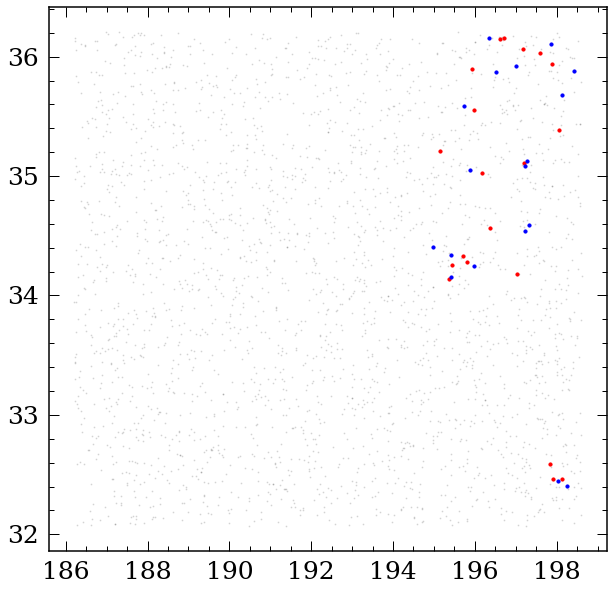

In [313]:
plt.scatter(df_sing['ra'],df_sing['dec'],s=1,c='k',alpha=0.1)
plt.scatter(df_data_sing['RA'],df_data_sing['DEC'],s=10,c='r')
selectstars=df_sing.loc[df_sing['iords'].isin(ids)]
plt.scatter(selectstars['ra'],selectstars['dec'],s=10,c='b')
print('select:',len(selectstars),', APOGEE:',len(df_data_sing))

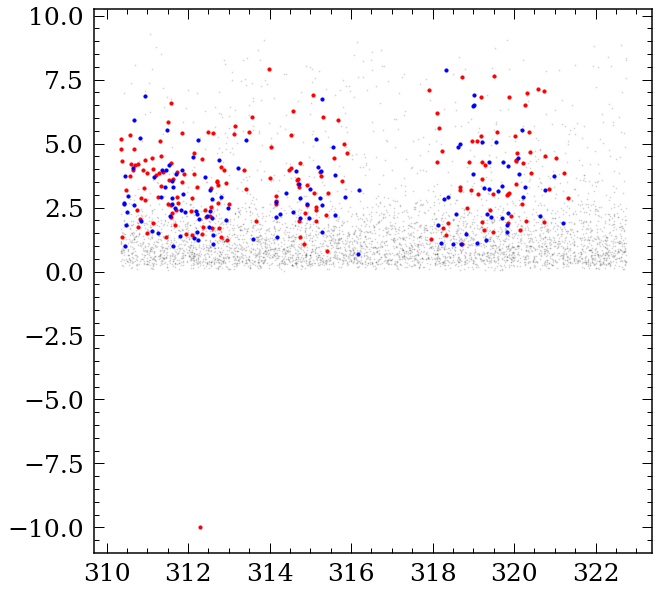

In [310]:
plt.scatter(df_sing['ra'],df_sing['dist'],s=1,c='k',alpha=0.1)
plt.scatter(df_data_sing['RA'],df_data_sing['GAIA_R_EST']/1000,s=10,c='r')
selectstars=df_sing.loc[df_sing['iords'].isin(ids)]
plt.scatter(selectstars['ra'],selectstars['dist'],s=10,c='b')

see matching results

In [703]:
ids=np.array([])
for i in range(counts):
    ids=np.append(ids,np.load('matches_708_x/ids_'+str(i)+'.npy'))

In [704]:
df=pd.read_pickle('../SecondYear_2/Data/CannonDR16_cut.pkl')
sim=pd.read_pickle('Data/Buck_g7_08e11.pkl')
sim=sim.dropna(subset=['x_today','y_today','z_today']).reset_index(drop=True)
d=SkyCoord((sim.x_today.values+8.2)*u.kpc, sim.y_today.values*u.kpc, sim.z_today.values*u.kpc, representation='cartesian')
d.representation = 'spherical'
d
sim['ra']=d.ra
sim['dec']=d.dec
sim['dist']=d.distance

sim_match=sim.loc[sim['iords'].isin(ids)]

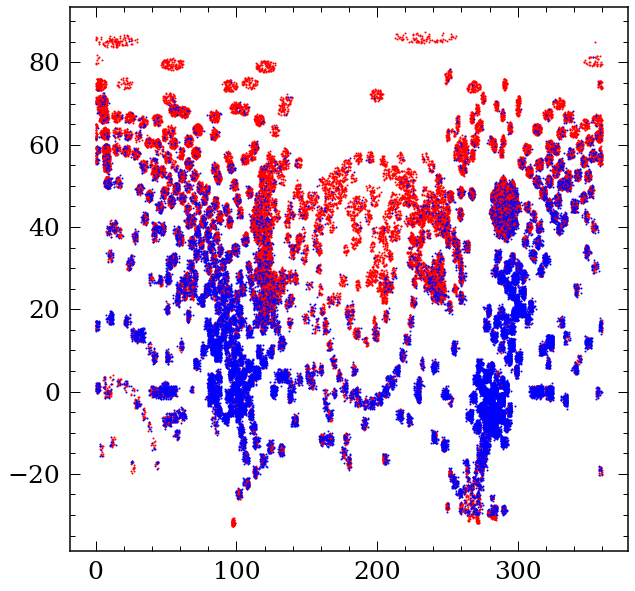

In [705]:
plt.scatter(df['RA'],df['DEC'],s=1,c='r')
plt.scatter(sim_match['ra'],sim_match['dec'],s=1,c='b')

/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


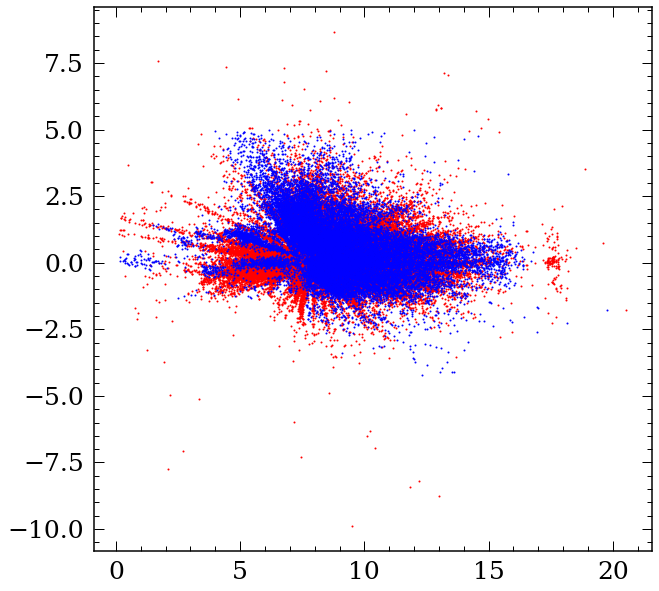

In [706]:
plt.scatter(df['R'],df['z'],s=1,c='r')
sim_match['R']=np.sqrt(sim_match['x_today']**2+sim_match['y_today']**2)
plt.scatter(sim_match['R'],sim_match['z_today'],s=1,c='b')

In [707]:
np.mean(df['M_H']),np.mean(df['O_FE'])

(-0.0906638577580452, 0.08182460814714432)

/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


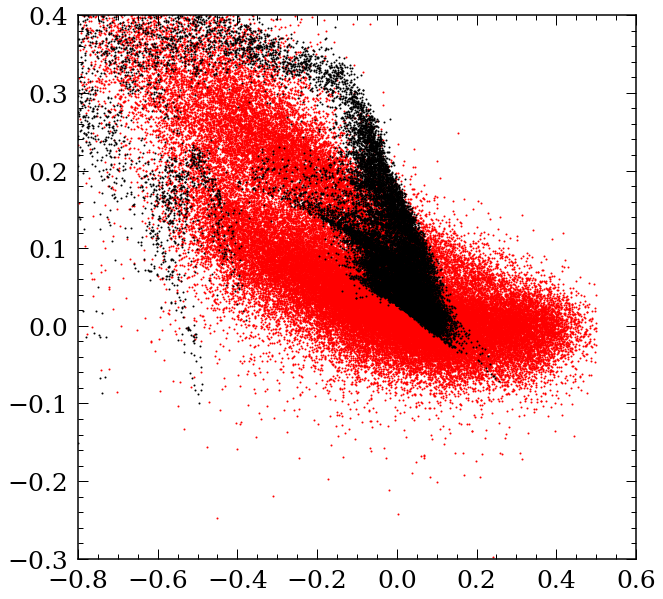

In [708]:
plt.scatter(df['M_H'],df['O_FE'],s=1,c='r')
scale_fe=np.std(df['M_H'])/np.std(sim_match['feh'])
scale_o=np.std(df['O_FE'])/np.std(sim_match['ofe'])
plt.xlim([-0.8,0.6])
plt.ylim([-0.3,0.4])

sim_match['feh_scale']=sim_match['feh']*scale_fe+np.median(df['M_H'])-np.median(sim_match['feh'])
sim_match['ofe_scale']=sim_match['ofe']*scale_o+np.median(df['O_FE'])-np.median(sim_match['ofe'])

plt.scatter(sim_match['feh_scale'],sim_match['ofe_scale'],s=1,c='k')

In [709]:
sim_match.to_pickle('Data/Buck_g7_08e11_apogee_selec.pkl')